In [1]:
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 15.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from pymongo import MongoClient
client =MongoClient('mongodb://localhost:27017/')

In [ ]:
db = client['PGDM']
collection = db ['project']

loan=pd.DataFrame(list(collection.find()))

# **Exploratory Data Analysis**

<ipython-input-31-48c6b23a4a31>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_approval_counts = loan_approval.groupby('Income_Category')['LoanApproved'].value_counts().unstack()


<Figure size 1000x600 with 0 Axes>

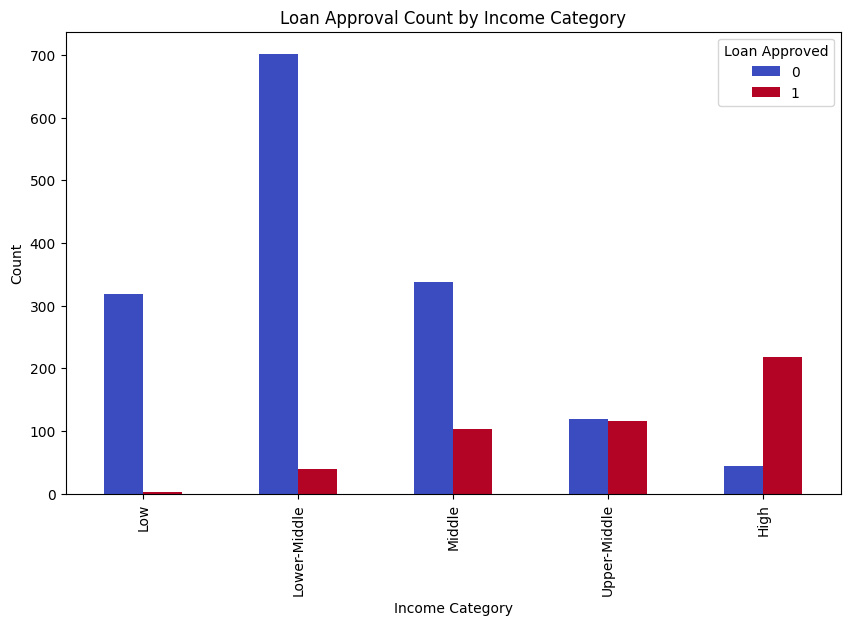

In [ ]:
# Categorizing income levels
loan_approval['Income_Category'] = pd.cut(loan_approval['AnnualIncome'], bins=[0, 25000, 50000, 75000, 100000, loan_approval['AnnualIncome'].max()],
                               labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])

# Bar Graph: Loan Approval Count by Income Category
plt.figure(figsize=(10, 6))
loan_approval_counts = loan_approval.groupby('Income_Category')['LoanApproved'].value_counts().unstack()
loan_approval_counts.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Loan Approval Count by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Loan Approved', loc='upper right')
plt.show()
# Inference - The data suggests a large, potentially underserved market for loans within the low and lower-middle income
# categories who face higher rejection rates. Businesses could strategically explore tailored loan products or partnerships to better serve this segment.

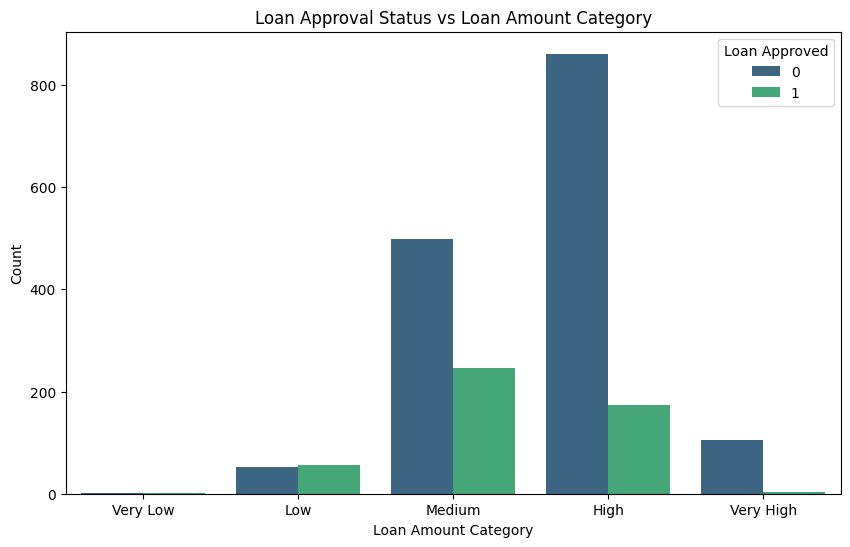

In [ ]:
# Categorizing LoanAmount into groups for better visualization
loan_approval['LoanAmount_Category'] = pd.cut(loan_approval['LoanAmount'], bins=[0, 5000, 10000, 20000, 50000, loan_approval['LoanAmount'].max()],
                                   labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Bar Graph: Loan Amount Categories and Loan Approval Status
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanAmount_Category', hue='LoanApproved', data=loan_approval, palette='viridis')
plt.title('Loan Approval Status vs Loan Amount Category')
plt.xlabel('Loan Amount Category')
plt.ylabel('Count')
plt.legend(title='Loan Approved')
plt.show()
# Inference - The graph shows that the 'High' loan amount category has the most loan applications
# and decisions (both approved and not approved). Very large loans ('Very High') are less frequent.

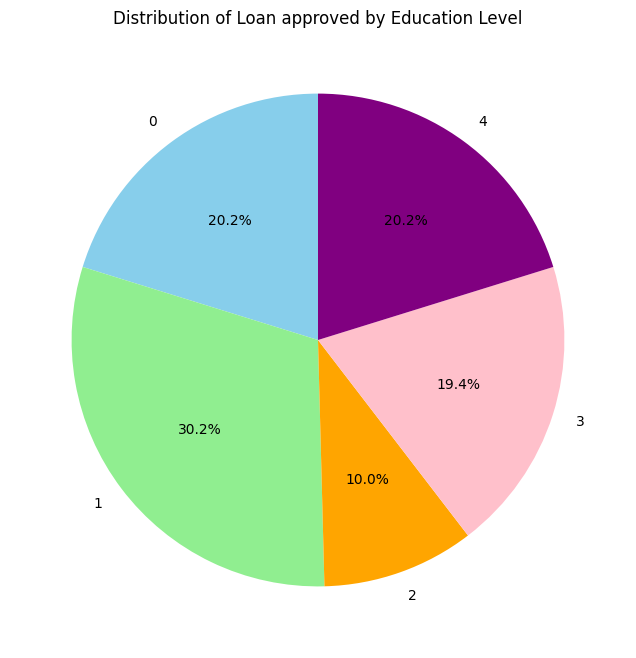

In [ ]:
#Group data by Education Level and count defaults
education = loan_approval.groupby('EducationLevel')['LoanApproved'].sum()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(education,labels=education.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'pink', 'purple'])
plt.title('Distribution of Loan approved by Education Level')
plt.show()
# Inference - The largest number of loan approvals is for Graduates, indicating they might be a key target demographic. The 'Other' education level has the lowest approval share.

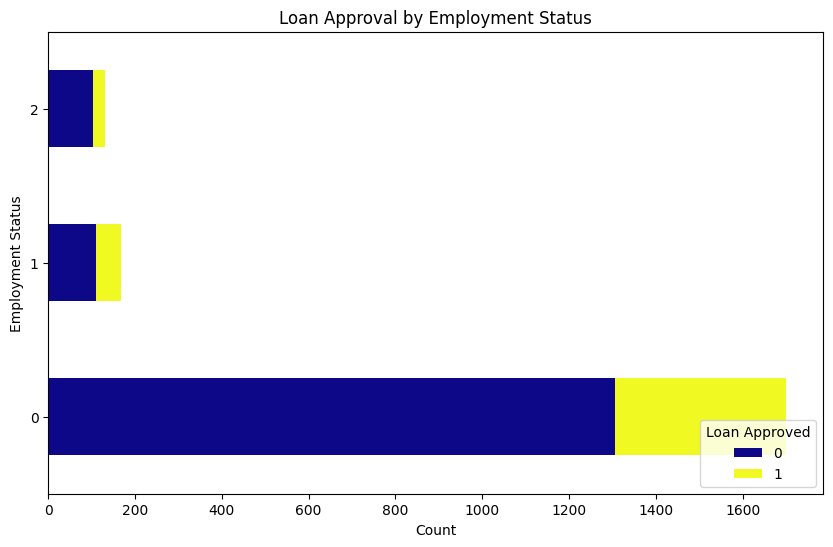

In [ ]:
loan_approval_counts = pd.crosstab(loan_approval['EmploymentStatus'], loan_approval['LoanApproved'])

# Stacked Horizontal Bar Chart
loan_approval_counts.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Loan Approval by Employment Status')
plt.xlabel('Count')
plt.ylabel('Employment Status')
plt.legend(title='Loan Approved', loc='lower right')
plt.show()
plt.show()
# Inference - The horizontal bar chart shows loan approval status (1 = Approved, 0 = Not Approved) for different employment statuses (0, 1, 2). Employment status '0' has the highest number of both approved and not approved loans.
# Employment statuses '1' and '2' have significantly fewer loan applications overall compared to '0'.

<ipython-input-37-fd4ee9d92523>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_approval, x='LoanApproved', palette='Set2')


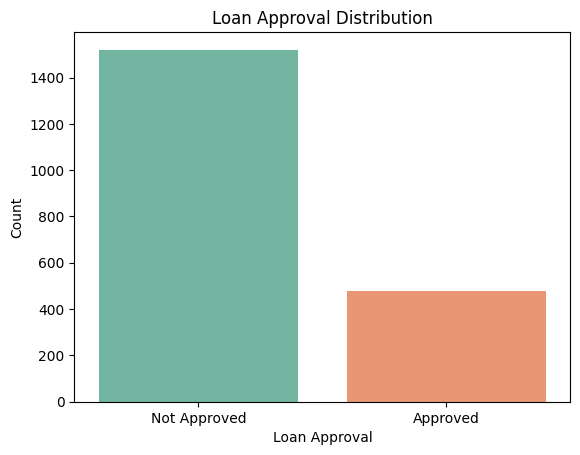

In [ ]:
sns.countplot(data=loan_approval, x='LoanApproved', palette='Set2')
plt.title('Loan Approval Distribution')
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.xlabel("Loan Approval")
plt.ylabel("Count")
plt.show()
# Inference - The majority of loan applications are not approved, indicating a potential need to analyze
# the reasons for rejection and possibly adjust lending criteria or product offerings.

<ipython-input-48-1c24623dfa57>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loan_approval, x='EmploymentStatus', y='LoanApproved', palette='coolwarm')


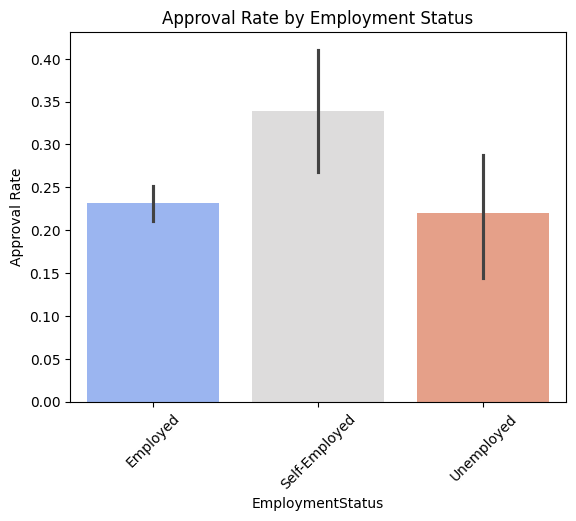

In [ ]:
sns.barplot(data=loan_approval, x='EmploymentStatus', y='LoanApproved', palette='coolwarm')
plt.title("Approval Rate by Employment Status")
plt.ylabel("Approval Rate")
plt.xticks(rotation=45)
plt.show()
# Inference - Self-Employed applicants show the highest loan approval rate on average, suggesting they might be a less risky segment.
# Unemployed applicants have the lowest approval rate, indicating a higher risk associated with this group.

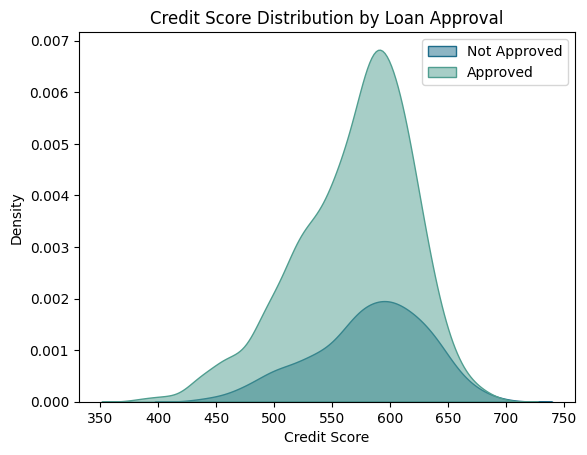

In [ ]:
sns.kdeplot(data=loan_approval, x="CreditScore", hue="LoanApproved", fill=True, alpha=0.5, palette="crest")
plt.title("Credit Score Distribution by Loan Approval")
plt.xlabel("Credit Score")
plt.legend(labels=["Not Approved", "Approved"])
plt.show()
# Inference - Higher credit scores are strongly associated with loan approval,
# suggesting a focus on applicants with good credit history. However, the overlap indicates other factors also influence the decision.

<ipython-input-52-a77792ab91b0>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Status", y="Count", data=approval_data, palette=["#00C49F", "#FF8042"], ax=axes[0, 0])
<ipython-input-52-a77792ab91b0>:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_age = df.groupby("AgeGroup")["RiskScore"].mean().reset_index()


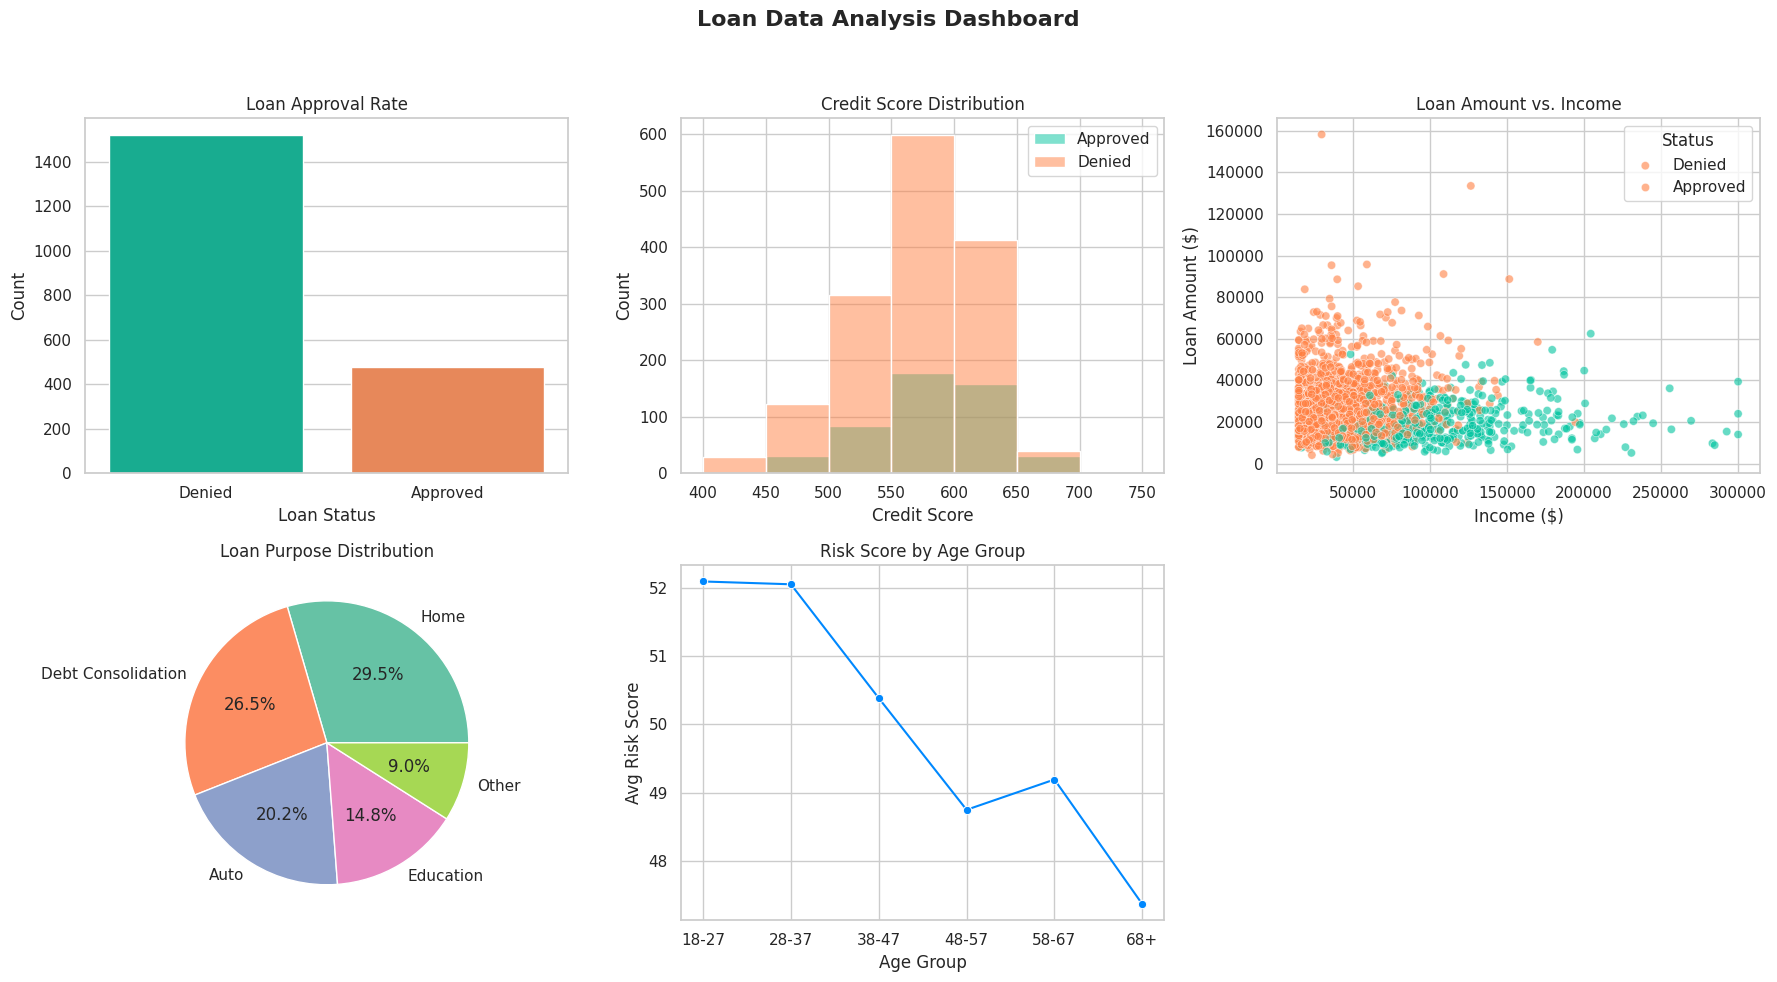

Interesting Fact: Applicants with credit scores above 600 have a 29.1% approval rate, highlighting the importance of creditworthiness.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Load and clean the dataset
def load_and_clean_data(file_path):
    # Read CSV
    df = pd.read_csv(file_path)

    # Convert columns to appropriate types
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce").fillna(0).astype(int)
    df["AnnualIncome"] = pd.to_numeric(df["AnnualIncome"], errors="coerce").fillna(0)
    df["CreditScore"] = pd.to_numeric(df["CreditScore"], errors="coerce").fillna(0).astype(int)
    df["LoanAmount"] = pd.to_numeric(df["LoanAmount"], errors="coerce").fillna(0)
    df["DebtToIncomeRatio"] = pd.to_numeric(df["DebtToIncomeRatio"], errors="coerce").fillna(0)
    df["LoanApproved"] = df["LoanApproved"].apply(lambda x: True if str(x).strip() == "1" else False)
    df["RiskScore"] = pd.to_numeric(df["RiskScore"], errors="coerce").fillna(0)
    df["LoanPurpose"] = df["LoanPurpose"].fillna("Unknown").str.strip()

    # Filter out invalid rows
    df = df[
        (df["Age"] > 0) &
        (df["AnnualIncome"] > 0) &
        (df["CreditScore"] > 0) &
        (df["LoanAmount"] > 0)
    ]

    return df

# Create dashboard
def create_dashboard(df):
    # Create a 2x3 grid of subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle("Loan Data Analysis Dashboard", fontsize=16, fontweight="bold")

    # Plot 1: Loan Approval Rate Bar Chart
    approval_counts = df["LoanApproved"].value_counts()
    approval_data = pd.DataFrame({
        "Status": ["Approved" if x else "Denied" for x in approval_counts.index],
        "Count": approval_counts.values
    })
    sns.barplot(x="Status", y="Count", data=approval_data, palette=["#00C49F", "#FF8042"], ax=axes[0, 0])
    axes[0, 0].set_title("Loan Approval Rate")
    axes[0, 0].set_xlabel("Loan Status")
    axes[0, 0].set_ylabel("Count")

    # Plot 2: Credit Score Distribution Histogram
    bins = np.arange(400, 800, 50)
    sns.histplot(
        data=df[df["LoanApproved"]], x="CreditScore", bins=bins, color="#00C49F",
        label="Approved", alpha=0.5, ax=axes[0, 1]
    )
    sns.histplot(
        data=df[~df["LoanApproved"]], x="CreditScore", bins=bins, color="#FF8042",
        label="Denied", alpha=0.5, ax=axes[0, 1]
    )
    axes[0, 1].set_title("Credit Score Distribution")
    axes[0, 1].set_xlabel("Credit Score")
    axes[0, 1].set_ylabel("Count")
    axes[0, 1].legend()

    # Plot 3: Loan Amount vs. Annual Income Scatter Plot
    sns.scatterplot(
        x="AnnualIncome", y="LoanAmount", hue="LoanApproved",
        palette={True: "#00C49F", False: "#FF8042"}, data=df, alpha=0.6, ax=axes[0, 2]
    )
    axes[0, 2].set_title("Loan Amount vs. Income")
    axes[0, 2].set_xlabel("Income ($)")
    axes[0, 2].set_ylabel("Loan Amount ($)")
    axes[0, 2].legend(title="Status", labels=["Denied", "Approved"])

    # Plot 4: Loan Purpose Pie Chart
    purpose_counts = df["LoanPurpose"].value_counts()
    axes[1, 0].pie(
        purpose_counts, labels=purpose_counts.index, autopct="%1.1f%%",
        colors=sns.color_palette("Set2", len(purpose_counts))
    )
    axes[1, 0].set_title("Loan Purpose Distribution")

    # Plot 5: Average Risk Score by Age Group
    df["AgeGroup"] = pd.cut(
        df["Age"], bins=[18, 27, 37, 47, 57, 67, 100],
        labels=["18-27", "28-37", "38-47", "48-57", "58-67", "68+"], right=False
    )
    risk_by_age = df.groupby("AgeGroup")["RiskScore"].mean().reset_index()
    sns.lineplot(
        x="AgeGroup", y="RiskScore", data=risk_by_age, marker="o", color="#0088FE", ax=axes[1, 1]
    )
    axes[1, 1].set_title("Risk Score by Age Group")
    axes[1, 1].set_xlabel("Age Group")
    axes[1, 1].set_ylabel("Avg Risk Score")

    # Remove empty subplot
    axes[1, 2].axis("off")

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Main function
def main():
    # Load data
    file_path = "focused_synthetic_loan_data.csv"
    df = load_and_clean_data(file_path)

    # Create and display dashboard
    create_dashboard(df)

    # Print interesting fact
    approval_rate_high_credit = df[df["CreditScore"] > 600]["LoanApproved"].mean() * 100
    print(f"Interesting Fact: Applicants with credit scores above 600 have a {approval_rate_high_credit:.1f}% approval rate, highlighting the importance of creditworthiness.")

if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
loan_approval = pd.read_csv('/content/focused_synthetic_loan_data.csv')

In [ ]:
loan_approval.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,01-01-2018,45,26032,467,Employed,Associate,24,17499,36,Divorced,...,2169.333333,0.704786,7,28301,0.268999,0.258727,703.859114,0.592283,0,52.0
1,02-01-2018,38,47162,552,Employed,High School,16,27728,60,Single,...,3930.166667,0.912653,8,1480,0.256728,0.242414,801.568058,0.296824,0,55.0
2,03-01-2018,47,26925,548,Self-Employed,Doctorate,26,14069,48,Married,...,2243.750000,0.680266,5,49697,0.235069,0.246830,464.003387,0.461283,0,59.0
3,04-01-2018,58,51278,583,Employed,Bachelor,36,40059,36,Single,...,4273.166667,0.881174,6,4204,0.233559,0.249076,1590.782097,0.456753,0,52.0
4,05-01-2018,37,179937,625,Employed,Bachelor,18,34774,48,Single,...,14994.750000,0.894550,4,39421,0.217274,0.260729,1173.911908,0.125038,1,40.0


In [ ]:
loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             2000 non-null   object 
 1   Age                         2000 non-null   int64  
 2   AnnualIncome                2000 non-null   int64  
 3   CreditScore                 2000 non-null   int64  
 4   EmploymentStatus            2000 non-null   object 
 5   EducationLevel              2000 non-null   object 
 6   Experience                  2000 non-null   int64  
 7   LoanAmount                  2000 non-null   int64  
 8   LoanDuration                2000 non-null   int64  
 9   MaritalStatus               2000 non-null   object 
 10  NumberOfDependents          2000 non-null   int64  
 11  HomeOwnershipStatus         2000 non-null   object 
 12  MonthlyDebtPayments         2000 non-null   int64  
 13  CreditCardUtilizationRate   2000 

In [ ]:
loan_approval.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,40.183000,58896.244500,572.317500,17.931000,24990.177500,52.932000,1.549000,449.158500,0.282750,2.968000,...,4873.214250,0.796534,5.008000,7.498781e+04,0.237941,0.237620,930.521472,0.422619,0.24000,50.564000
std,11.526532,41232.615305,50.301539,11.316062,13658.862298,24.271834,1.422888,244.976709,0.156970,1.770182,...,3379.456358,0.122502,2.245319,1.276867e+05,0.035279,0.041543,701.239869,0.379525,0.42719,7.502483
min,18.000000,15000.000000,386.000000,0.000000,3202.000000,12.000000,0.000000,71.000000,0.006882,0.000000,...,1250.000000,0.193343,0.000000,1.022000e+03,0.147283,0.131131,98.488112,0.020364,0.00000,28.000000
25%,32.000000,30501.750000,541.000000,9.750000,15659.750000,36.000000,0.000000,276.750000,0.159677,2.000000,...,2536.250000,0.720587,3.000000,9.080750e+03,0.213223,0.208183,497.527836,0.179575,0.00000,46.000000
50%,40.000000,47513.500000,581.000000,17.000000,21958.000000,48.000000,1.000000,394.500000,0.263912,3.000000,...,3943.291667,0.818472,5.000000,3.560150e+04,0.235219,0.234784,741.154972,0.320776,0.00000,52.000000
75%,48.000000,74464.500000,609.000000,26.000000,31164.500000,60.000000,3.000000,559.000000,0.391524,4.000000,...,6172.770833,0.892183,6.000000,8.916700e+04,0.259973,0.262931,1104.024502,0.522351,0.00000,56.000000
max,80.000000,300000.000000,697.000000,58.000000,158128.000000,120.000000,5.000000,2555.000000,0.812171,10.000000,...,25000.000000,0.998006,20.000000,2.442496e+06,0.376128,0.400581,8150.366039,3.361750,1.00000,81.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns_to_encode = ['MaritalStatus', 'EmploymentStatus', 'HomeOwnershipStatus','EducationLevel']

label_encoder = LabelEncoder()

for column in categorical_columns_to_encode:
    loan_approval[column] = label_encoder.fit_transform(loan_approval[column])

# Display the updated dataset (only selected columns are encoded)
print(loan_approval.head())

  ApplicationDate  Age  AnnualIncome  CreditScore  EmploymentStatus  \
0      01-01-2018   45         26032          467                 0   
1      02-01-2018   38         47162          552                 0   
2      03-01-2018   47         26925          548                 1   
3      04-01-2018   58         51278          583                 0   
4      05-01-2018   37        179937          625                 0   

   EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  ...  \
0               0          24       17499            36              0  ...   
1               3          16       27728            60              2  ...   
2               2          26       14069            48              1  ...   
3               1          36       40059            36              2  ...   
4               1          18       34774            48              2  ...   

   JobTenure  NetWorth  BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0          7     283

In [ ]:
loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ApplicationDate             2000 non-null   object  
 1   Age                         2000 non-null   int64   
 2   AnnualIncome                2000 non-null   int64   
 3   CreditScore                 2000 non-null   int64   
 4   EmploymentStatus            2000 non-null   int64   
 5   EducationLevel              2000 non-null   int64   
 6   Experience                  2000 non-null   int64   
 7   LoanAmount                  2000 non-null   int64   
 8   LoanDuration                2000 non-null   int64   
 9   MaritalStatus               2000 non-null   int64   
 10  NumberOfDependents          2000 non-null   int64   
 11  HomeOwnershipStatus         2000 non-null   int64   
 12  MonthlyDebtPayments         2000 non-null   int64   
 13  CreditCardUtilizat

In [ ]:
loan_approval.drop('ApplicationDate', axis=1 , inplace=True)

# **Feature Engineering**

In [ ]:
df = loan_approval.drop(columns=["ApplicationDate"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

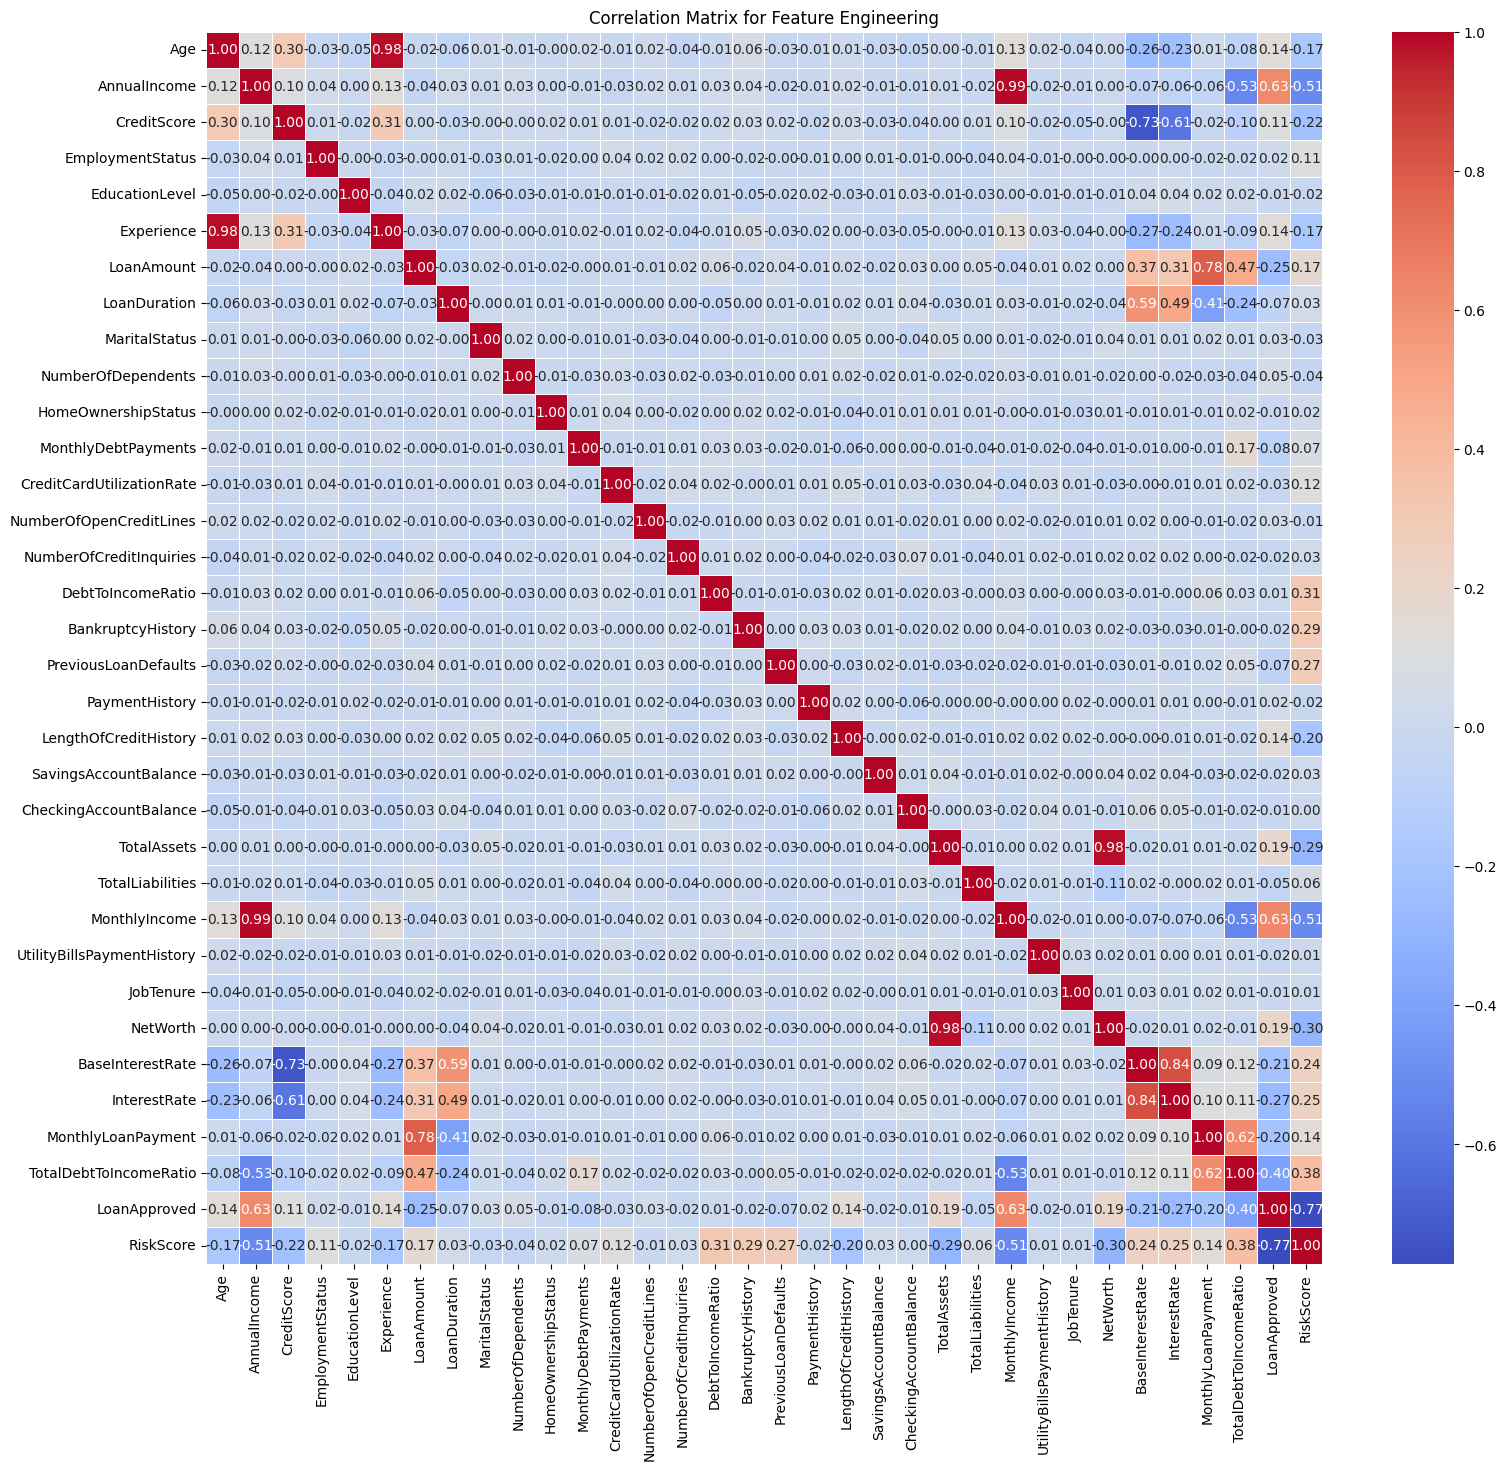

In [ ]:
numerical_columns = loan_approval.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = loan_approval[numerical_columns].corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Feature Engineering')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop(columns=["LoanApproved", "RiskScore"])
y = df_encoded["LoanApproved"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(50))

TotalDebtToIncomeRatio        0.229989
MonthlyIncome                 0.157078
AnnualIncome                  0.138580
InterestRate                  0.053310
LoanAmount                    0.042818
NetWorth                      0.039998
TotalAssets                   0.032747
BaseInterestRate              0.026352
MonthlyLoanPayment            0.025598
LengthOfCreditHistory         0.025361
CreditScore                   0.018209
MonthlyDebtPayments           0.016353
LoanDuration                  0.015127
SavingsAccountBalance         0.015121
UtilityBillsPaymentHistory    0.014546
TotalLiabilities              0.014428
CheckingAccountBalance        0.013933
Age                           0.013645
Experience                    0.013389
CreditCardUtilizationRate     0.013361
DebtToIncomeRatio             0.012971
PaymentHistory                0.011795
JobTenure                     0.008585
NumberOfOpenCreditLines       0.008106
EducationLevel                0.006179
LoanPurpose              

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=15)
selector = selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features via RFE:")
print(selected_features)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features via RFE:
Index(['Age', 'EmploymentStatus', 'LoanDuration', 'MaritalStatus',
       'NumberOfDependents', 'CreditCardUtilizationRate', 'DebtToIncomeRatio',
       'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults',
       'LengthOfCreditHistory', 'UtilityBillsPaymentHistory',
       'BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio'],
      dtype='object')


In [ ]:
# Encode categorical features with LabelEncoder
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Drop the target variable for VIF calculation
X = df_encoded.drop(columns=["LoanApproved"])

# Add constant for intercept
X_const = sm.add_constant(X)

# Calculate VIF for all features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display sorted VIFs
vif_data.sort_values(by="VIF", ascending=False, inplace=True)
print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Feature        VIF
8                 LoanDuration        inf
7                   LoanAmount        inf
3                  CreditScore        inf
30            BaseInterestRate        inf
26               MonthlyIncome  64.028671
2                 AnnualIncome  62.263779
29                    NetWorth  38.064012
24                 TotalAssets  37.413545
6                   Experience  29.768962
1                          Age  29.586932
32          MonthlyLoanPayment   5.646462
34                   RiskScore   4.300281
31                InterestRate   3.510811
33      TotalDebtToIncomeRatio   3.000775
17           BankruptcyHistory   1.510052
16           DebtToIncomeRatio   1.499222
25            TotalLiabilities   1.458093
19        PreviousLoanDefaults   1.283542
21       LengthOfCreditHistory   1.180486
12         MonthlyDebtPayments   1.111224
4             EmploymentStatus   1.095244
13   CreditCardUtilizationRate   1.056116
18                 LoanPurpose   1

In [ ]:
loan_pred = loan_approval[['Age','AnnualIncome','NetWorth','LoanAmount','CreditScore','Experience','BaseInterestRate','LoanDuration','DebtToIncomeRatio','MonthlyDebtPayments','LoanPurpose']]
loan_target = loan_approval['LoanApproved']

In [ ]:
loan_pred.corr()

ValueError: could not convert string to float: 'Education'

In [ ]:
predictors_df1 = pd.get_dummies(loan_pred)
predictors_df1.corr()

,Age,AnnualIncome,NetWorth,LoanAmount,CreditScore,Experience,BaseInterestRate,LoanDuration,DebtToIncomeRatio,MonthlyDebtPayments,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
Age,1.000000,0.124934,0.002181,-0.022711,0.296870,0.982806,-0.256476,-0.062856,-0.007042,0.018573,0.004979,-0.020055,0.005600,-0.011890,0.035942
AnnualIncome,0.124934,1.000000,0.004397,-0.040691,0.100353,0.126681,-0.069831,0.030465,0.027653,-0.006124,-0.037968,-0.008294,0.030664,0.007858,0.015487
NetWorth,0.002181,0.004397,1.000000,0.003081,-0.000666,-0.000562,-0.020237,-0.038206,0.029498,-0.011331,0.013229,0.009633,-0.000498,-0.000768,-0.031574
LoanAmount,-0.022711,-0.040691,0.003081,1.000000,0.002112,-0.026164,0.367529,-0.031635,0.057351,-0.004550,0.015624,-0.014300,0.005542,0.028260,-0.051776
CreditScore,0.296870,0.100353,-0.000666,0.002112,1.000000,0.305513,-0.731976,-0.034664,0.015375,0.006477,0.014084,0.007653,0.005964,-0.024730,0.000446
Experience,0.982806,0.126681,-0.000562,-0.026164,0.305513,1.000000,-0.265457,-0.065443,-0.008819,0.018089,0.001417,-0.014964,0.009761,-0.018926,0.039137
BaseInterestRate,-0.256476,-0.069831,-0.020237,0.367529,-0.731976,-0.265457,1.000000,0.585802,-0.014810,-0.009821,0.020709,-0.026678,-0.005961,0.025622,-0.021345
LoanDuration,-0.062856,0.030465,-0.038206,-0.031635,-0.034664,-0.065443,0.585802,1.000000,-0.045441,-0.006004,0.043083,-0.027358,-0.006724,-0.005145,-0.001711
DebtToIncomeRatio,-0.007042,0.027653,0.029498,0.057351,0.015375,-0.008819,-0.014810,-0.045441,1.000000,0.025698,-0.023897,-0.045293,-0.023629,0.066460,0.026787
MonthlyDebtPayments,0.018573,-0.006124,-0.011331,-0.004550,0.006477,0.018089,-0.009821,-0.006004,0.025698,1.000000,0.022521,-0.001568,0.011482,-0.004277,-0.036607


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
import sys
!{sys.executable} -m pip install dmba

from dmba import classificationSummary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 93.8 MB/s eta 0:00:00
Colab environment detected.


In [ ]:
def categorize_approval(value):
    if value == 0:
        return 0  # Not  Default

    else:
        return 1  # Default

In [ ]:
loan_approval['Loan_approve'] = loan_approval['LoanApproved'].apply(categorize_approval)

In [ ]:
z_score_norm = preprocessing.StandardScaler()
predictor_df_normalized = z_score_norm.fit_transform(predictors_df1)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df1.columns)
predictor_df_normalized.head(10)

,Age,AnnualIncome,NetWorth,LoanAmount,CreditScore,Experience,BaseInterestRate,LoanDuration,DebtToIncomeRatio,MonthlyDebtPayments,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.418010,-0.797244,-0.365727,-0.548585,-2.094247,0.536451,0.880573,-0.697773,-0.748175,0.538314,-0.503123,-0.600453,2.399324,-0.646869,-0.314485
1,-0.189437,-0.284658,-0.575833,0.200493,-0.404015,-0.170685,0.532655,0.291275,-0.148307,-0.343623,-0.503123,-0.600453,-0.416784,1.545908,-0.314485
2,0.591566,-0.775581,-0.198119,-0.799767,-0.483555,0.713236,-0.081442,-0.203249,0.278619,0.497484,1.987585,-0.600453,-0.416784,-0.646869,-0.314485
3,1.546125,-0.184809,-0.554494,1.103503,0.212422,1.597156,-0.124255,-0.697773,-0.111387,-0.359955,-0.503123,-0.600453,-0.416784,1.545908,-0.314485
4,-0.276215,2.936293,-0.278617,0.716478,1.047596,0.006099,-0.585982,-0.203249,0.204979,1.028279,-0.503123,1.665408,-0.416784,-0.646869,-0.314485
5,-0.276215,0.550497,-0.464509,0.313049,-0.503440,-0.347469,0.363586,-0.203249,-0.061100,-0.376287,-0.503123,1.665408,-0.416784,-0.646869,-0.314485
6,1.546125,2.068510,-0.516250,0.568112,0.093112,1.508764,1.738222,2.763894,2.491858,-1.217394,-0.503123,-0.600453,-0.416784,1.545908,-0.314485
7,0.765122,0.353710,-0.138309,-0.719067,-2.332868,0.890020,1.835274,0.785798,-0.751805,0.007519,-0.503123,-0.600453,-0.416784,1.545908,-0.314485
8,-0.536549,0.653039,-0.242481,-0.646788,-1.139763,-0.701037,0.729140,0.291275,0.382948,-1.278639,1.987585,-0.600453,-0.416784,-0.646869,-0.314485
9,0.504788,-0.789942,-0.308557,0.519706,-1.636890,0.359667,2.102245,1.280322,0.929463,-1.037740,1.987585,-0.600453,-0.416784,-0.646869,-0.314485


In [ ]:
X = predictor_df_normalized
y = loan_approval['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model= LogisticRegression(multi_class='ovr')
model_1= model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print('intercept ', model_1.intercept_)
print(pd.DataFrame({'coeff': model_1.coef_[0]}, index=X.columns))

intercept  [-2.58208082]
                                   coeff
Age                             0.318643
AnnualIncome                    3.204666
NetWorth                        0.956898
LoanAmount                     -1.883571
CreditScore                    -0.223763
Experience                     -0.001927
BaseInterestRate               -0.697779
LoanDuration                   -0.223321
DebtToIncomeRatio              -0.033728
MonthlyDebtPayments            -0.496441
LoanPurpose_Auto               -0.042721
LoanPurpose_Debt Consolidation  0.065706
LoanPurpose_Education           0.085848
LoanPurpose_Home               -0.113608
LoanPurpose_Other               0.033124


In [ ]:
predicted_y= model_1.predict(X_train)
classificationSummary(y_train, predicted_y)

Confusion Matrix (Accuracy 0.9081)

       Prediction
Actual    0    1
     0 1166   50
     1   97  287


In [ ]:
y_pred = model_1.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(accuracy)

0.9025


In [ ]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       304
           1       0.81      0.77      0.79        96

    accuracy                           0.90       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report

<ipython-input-79-c30939ddc60f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x="Importance", y="Feature", palette="viridis")


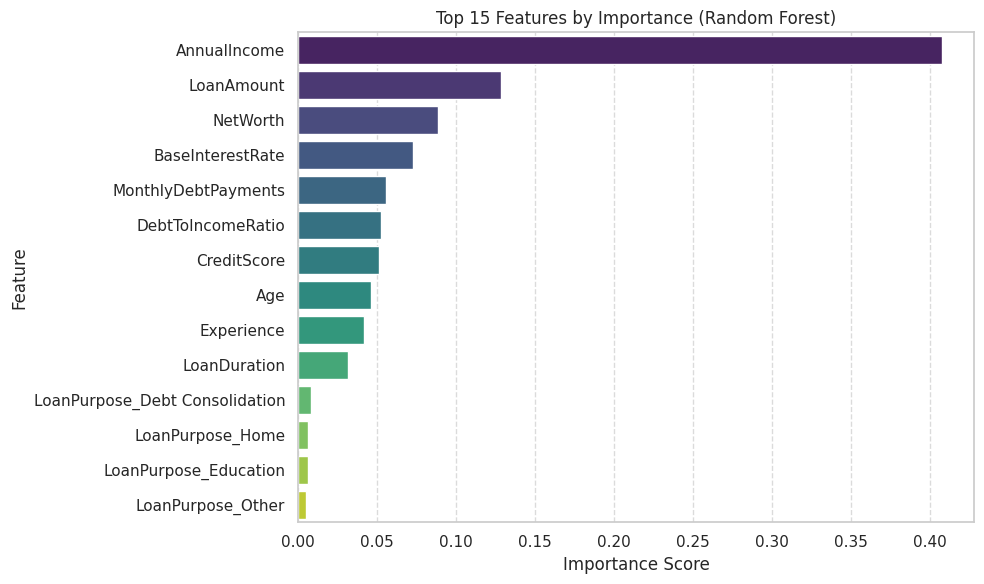

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Computing feature importances
feature_imp_RF = pd.Series(RF.feature_importances_, index=X.columns)

# Sorting by importance in descending order and select top 15
feature_importances = pd.DataFrame({'Feature': feature_imp_RF.index, 'Importance': feature_imp_RF.values})
top_features = feature_importances.sort_values(by="Importance", ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Features by Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# defining the variables
predictors = loan_approval[['Age','AnnualIncome','NetWorth','LoanAmount','CreditScore','Experience','BaseInterestRate','LoanDuration','DebtToIncomeRatio','MonthlyDebtPayments','LoanPurpose']]
response = loan_approval['LoanApproved']

In [ ]:
predictors = pd.get_dummies(data=predictors, drop_first=True)

In [ ]:
X = predictors
y = response
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# **Decision Trees**

In [ ]:
DT = DecisionTreeClassifier(random_state=42).fit(train_X,train_y)
predicted_y_training = DT.predict(train_X)
print(f1_score(train_y, predicted_y_training))
print(classification_report(train_y, predicted_y_training))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1221
           1       1.00      1.00      1.00       379

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
predicted_y_test = DT.predict(test_X)
print(f1_score(test_y, predicted_y_test))
print(classification_report(test_y, predicted_y_test))

0.6871794871794872
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       299
           1       0.71      0.66      0.69       101

    accuracy                           0.85       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.84      0.85      0.85       400



In [ ]:
feature_imp = pd.Series(DT.feature_importances_, index=predictors.columns)
feature_imp

,0
Age,0.026318
AnnualIncome,0.462856
NetWorth,0.102665
LoanAmount,0.144490
CreditScore,0.024413
Experience,0.019598
BaseInterestRate,0.078857
LoanDuration,0.025718
DebtToIncomeRatio,0.054985
MonthlyDebtPayments,0.047454


In [ ]:
feature_imp.idxmax()

'AnnualIncome'

In [ ]:
feature_imp.sort_values(ascending=False).head(25)

,0
AnnualIncome,0.462856
LoanAmount,0.144490
NetWorth,0.102665
BaseInterestRate,0.078857
DebtToIncomeRatio,0.054985
MonthlyDebtPayments,0.047454
Age,0.026318
LoanDuration,0.025718
CreditScore,0.024413
Experience,0.019598


In [ ]:
RF = RandomForestClassifier(random_state=616).fit(train_X,train_y)
predicted_y_training = RF.predict(train_X)
print(classification_report(train_y,predicted_y_training))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1221
           1       1.00      1.00      1.00       379

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
predicted_y_test = RF.predict(test_X)
print(classification_report(test_y,predicted_y_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       299
           1       0.88      0.68      0.77       101

    accuracy                           0.90       400
   macro avg       0.89      0.83      0.85       400
weighted avg       0.90      0.90      0.89       400



In [ ]:
feature_imp_RF = pd.Series(RF.feature_importances_, index=predictors.columns)
feature_imp_RF

,0
Age,0.046269
AnnualIncome,0.407443
NetWorth,0.088610
LoanAmount,0.128058
CreditScore,0.051356
Experience,0.041485
BaseInterestRate,0.072605
LoanDuration,0.031433
DebtToIncomeRatio,0.052476
MonthlyDebtPayments,0.055203


In [ ]:
feature_imp_RF.sort_values(ascending=False).head(25)

,0
AnnualIncome,0.407443
LoanAmount,0.128058
NetWorth,0.088610
BaseInterestRate,0.072605
MonthlyDebtPayments,0.055203
DebtToIncomeRatio,0.052476
CreditScore,0.051356
Age,0.046269
Experience,0.041485
LoanDuration,0.031433


In [ ]:
feature_imp_RF.idxmax()

'AnnualIncome'

# **Gradient Boosting**

In [ ]:
GB = GradientBoostingClassifier(random_state=616).fit(train_X,train_y)
predicted_y_training = GB.predict(train_X)
print(classification_report(train_y,predicted_y_training))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1221
           1       0.94      0.89      0.92       379

    accuracy                           0.96      1600
   macro avg       0.96      0.94      0.95      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
predicted_y_test = GB.predict(test_X)
print(classification_report(test_y,predicted_y_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       299
           1       0.83      0.70      0.76       101

    accuracy                           0.89       400
   macro avg       0.87      0.83      0.84       400
weighted avg       0.88      0.89      0.88       400



In [ ]:
feature_imp_GB = pd.Series(GB.feature_importances_, index=predictors.columns)
feature_imp_GB

,0
Age,7.509321e-03
AnnualIncome,6.145893e-01
NetWorth,7.860358e-02
LoanAmount,1.747405e-01
CreditScore,7.467356e-03
Experience,9.781917e-03
BaseInterestRate,5.916279e-02
LoanDuration,1.243803e-02
DebtToIncomeRatio,1.789031e-02
MonthlyDebtPayments,1.732195e-02


In [ ]:
feature_imp_GB.idxmax()

'AnnualIncome'

# **Time Series Forecasting**

In [ ]:
# Create Default column
df['Default'] = (df['LoanApproved'] == 0).astype(int)

# Aggregate monthly defaults
monthly_defaults = df.set_index('ApplicationDate').resample('M')['Default'].sum().reset_index()
monthly_defaults.rename(columns={'ApplicationDate': 'ds', 'Default': 'y'}, inplace=True)

# Filter data up to June 2023 for training
train = monthly_defaults[monthly_defaults['ds'] <= '2023-06-30']

# Train Prophet model
model = Prophet()
model.fit(train)

# Create future dataframe and forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Merge actual and forecast
merged = pd.merge(forecast[['ds', 'yhat']], monthly_defaults, on='ds', how='left')

# Separate actual and forecast with connection point
train_end = train['ds'].max()
connected_forecast = merged[merged['ds'] > train_end].copy()
connected_forecast.loc[train_end] = {
    'ds': train_end,
    'yhat': train[train['ds'] == train_end]['y'].values[0],
    'y': train[train['ds'] == train_end]['y'].values[0]
}
connected_forecast.sort_values('ds', inplace=True)

# Plotly interactive chart
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=train['ds'], y=train['y'],
    mode='lines+markers',
    name='Historical Defaults',
    line=dict(color='blue'),
    hovertemplate='Date: %{x|%b %Y}<br>Defaults: %{y}<extra></extra>'
))

# Forecast data (connected to last point)
fig.add_trace(go.Scatter(
    x=connected_forecast['ds'], y=connected_forecast['yhat'],
    mode='lines+markers',
    name='Forecasted Defaults',
    line=dict(color='orange'),
    hovertemplate='Date: %{x|%b %Y}<br>Forecast: %{y:.2f}<extra></extra>'
))

# Forecast start marker
fig.add_vline(x=train_end, line=dict(color='black', dash='dash'), name='Forecast Start')

# Layout
fig.update_layout(
    title='Interactive Loan Default Forecast',
    xaxis_title='Date',
    yaxis_title='Monthly Defaults',
    hovermode='x unified',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99)
)

fig.show()

<ipython-input-88-a394c4d4fe7c>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_defaults = df.set_index('ApplicationDate').resample('M')['Default'].sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn03vv_gl/qc2xzcdt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn03vv_gl/_vnhzaqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90776', 'data', 'file=/tmp/tmpn03vv_gl/qc2xzcdt.json', 'init=/tmp/tmpn03vv_gl/_vnhzaqu.json', 'output', 'file=/tmp/tmpn03vv_gl/prophet_modeli02avl5w/prophet_model-20250420183652.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18